<h1><center>                        Binary Classification</h1></center>

<h1> Import the libraries </h1>

In [71]:

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report,confusion_matrix, precision_recall_curve,auc, roc_curve
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score
import sys
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
import numpy
from sklearn.model_selection import cross_val_predict
numpy.set_printoptions(threshold=sys.maxsize)
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import  StandardScaler
from sklearn.dummy import DummyClassifier
from sklearn.metrics import multilabel_confusion_matrix
#from sklearn.metrics import plot_confusion_matrix

In [72]:
data = pd.read_csv(r'C:\Users\User\PycharmProjects\MSC CONTECH STUDY\Msc 1006 Asiignments and Project\Assignment 4\agaricus-lepiota.data',header=None)
mushroom_names = pd.read_fwf(r"C:\Users\User\PycharmProjects\MSC CONTECH STUDY\Msc 1006 Asiignments and Project\Assignment 4\agaricus-lepiota.names")
mushroom_index = pd.read_fwf(r'C:\Users\User\PycharmProjects\MSC CONTECH STUDY\Msc 1006 Asiignments and Project\Assignment 4\Index')

In [73]:
data

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [74]:
columns_names =  ["class","cap_shape","cap_surface,","cap_color","bruises?","odor","gill_attachment","gill_spacing","gill_size","gill_color","stalk_shape",
                  "stalk_root","stalk_surface_above_ring","stalk_surface_below_ring","stalk_color_above_ring","stalk_color_below_ring","veil_type",
                  "veil_color","ring_number","ring_type","spore_print_color","population", "habitant"]

In [75]:
len(columns_names)

23

In [76]:
data.columns=columns_names
data

,class,cap_shape,"cap_surface,",cap_color,bruises?,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitant
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [77]:
data.isna().sum()

class                       0
cap_shape                   0
cap_surface,                0
cap_color                   0
bruises?                    0
odor                        0
gill_attachment             0
gill_spacing                0
gill_size                   0
gill_color                  0
stalk_shape                 0
stalk_root                  0
stalk_surface_above_ring    0
stalk_surface_below_ring    0
stalk_color_above_ring      0
stalk_color_below_ring      0
veil_type                   0
veil_color                  0
ring_number                 0
ring_type                   0
spore_print_color           0
population                  0
habitant                    0
dtype: int64

<h1> Summary Sta

In [78]:
data.describe()

,class,cap_shape,"cap_surface,",cap_color,bruises?,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitant
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [79]:
data.nunique()

class                        2
cap_shape                    6
cap_surface,                 4
cap_color                   10
bruises?                     2
odor                         9
gill_attachment              2
gill_spacing                 2
gill_size                    2
gill_color                  12
stalk_shape                  2
stalk_root                   5
stalk_surface_above_ring     4
stalk_surface_below_ring     4
stalk_color_above_ring       9
stalk_color_below_ring       9
veil_type                    1
veil_color                   4
ring_number                  3
ring_type                    5
spore_print_color            9
population                   6
habitant                     7
dtype: int64

In [80]:
for count in data:
    characterics= data[count].value_counts()
    print(characterics)

class
e    4208
p    3916
Name: count, dtype: int64
cap_shape
x    3656
f    3152
k     828
b     452
s      32
c       4
Name: count, dtype: int64
cap_surface,
y    3244
s    2556
f    2320
g       4
Name: count, dtype: int64
cap_color
n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
u      16
r      16
Name: count, dtype: int64
bruises?
f    4748
t    3376
Name: count, dtype: int64
odor
n    3528
f    2160
y     576
s     576
a     400
l     400
p     256
c     192
m      36
Name: count, dtype: int64
gill_attachment
f    7914
a     210
Name: count, dtype: int64
gill_spacing
c    6812
w    1312
Name: count, dtype: int64
gill_size
b    5612
n    2512
Name: count, dtype: int64
gill_color
b    1728
p    1492
w    1202
n    1048
g     752
h     732
u     492
k     408
e      96
y      86
o      64
r      24
Name: count, dtype: int64
stalk_shape
t    4608
e    3516
Name: count, dtype: int64
stalk_root
b    3776
?    2480
e    1120
c     556
r     192
Name: co

<h1> Preprocessing</h1>

In [81]:
mappings = list()
label_encoder = LabelEncoder()
for column in range(len(data.columns)):
    data[data.columns[column]] = label_encoder.fit_transform(data[data.columns[column]])
    dict_mapping = {index:label for index, label in enumerate(label_encoder.classes_)}
    mappings.append(dict_mapping)
mappings

[{0: 'e', 1: 'p'},
 {0: 'b', 1: 'c', 2: 'f', 3: 'k', 4: 's', 5: 'x'},
 {0: 'f', 1: 'g', 2: 's', 3: 'y'},
 {0: 'b',
  1: 'c',
  2: 'e',
  3: 'g',
  4: 'n',
  5: 'p',
  6: 'r',
  7: 'u',
  8: 'w',
  9: 'y'},
 {0: 'f', 1: 't'},
 {0: 'a', 1: 'c', 2: 'f', 3: 'l', 4: 'm', 5: 'n', 6: 'p', 7: 's', 8: 'y'},
 {0: 'a', 1: 'f'},
 {0: 'c', 1: 'w'},
 {0: 'b', 1: 'n'},
 {0: 'b',
  1: 'e',
  2: 'g',
  3: 'h',
  4: 'k',
  5: 'n',
  6: 'o',
  7: 'p',
  8: 'r',
  9: 'u',
  10: 'w',
  11: 'y'},
 {0: 'e', 1: 't'},
 {0: '?', 1: 'b', 2: 'c', 3: 'e', 4: 'r'},
 {0: 'f', 1: 'k', 2: 's', 3: 'y'},
 {0: 'f', 1: 'k', 2: 's', 3: 'y'},
 {0: 'b', 1: 'c', 2: 'e', 3: 'g', 4: 'n', 5: 'o', 6: 'p', 7: 'w', 8: 'y'},
 {0: 'b', 1: 'c', 2: 'e', 3: 'g', 4: 'n', 5: 'o', 6: 'p', 7: 'w', 8: 'y'},
 {0: 'p'},
 {0: 'n', 1: 'o', 2: 'w', 3: 'y'},
 {0: 'n', 1: 'o', 2: 't'},
 {0: 'e', 1: 'f', 2: 'l', 3: 'n', 4: 'p'},
 {0: 'b', 1: 'h', 2: 'k', 3: 'n', 4: 'o', 5: 'r', 6: 'u', 7: 'w', 8: 'y'},
 {0: 'a', 1: 'c', 2: 'n', 3: 's', 4: 'v', 5: 'y

In [82]:
data

,class,cap_shape,"cap_surface,",cap_color,bruises?,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitant
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,...,2,5,5,0,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,...,2,5,5,0,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,...,2,5,5,0,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,...,1,7,7,0,2,1,0,7,4,2


In [83]:
data.describe()

,class,cap_shape,"cap_surface,",cap_color,bruises?,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitant
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,...,8124.000000,8124.000000,8124.000000,8124.0,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,0.482029,3.348104,1.827671,4.504677,0.415559,4.144756,0.974151,0.161497,0.309207,4.810684,...,1.603644,5.816347,5.794682,0.0,1.965534,1.069424,2.291974,3.596750,3.644018,1.508616
std,0.499708,1.604329,1.229873,2.545821,0.492848,2.103729,0.158695,0.368011,0.462195,3.540359,...,0.675974,1.901747,1.907291,0.0,0.242669,0.271064,1.801672,2.382663,1.252082,1.719975
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,...,1.000000,6.000000,6.000000,0.0,2.000000,1.000000,0.000000,2.000000,3.000000,0.000000
50%,0.000000,3.000000,2.000000,4.000000,0.000000,5.000000,1.000000,0.000000,0.000000,5.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,2.000000,3.000000,4.000000,1.000000
75%,1.000000,5.000000,3.000000,8.000000,1.000000,5.000000,1.000000,0.000000,1.000000,7.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,4.000000,7.000000,4.000000,2.000000
max,1.000000,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,...,3.000000,8.000000,8.000000,0.0,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000


In [84]:
data.dtypes

class                       int32
cap_shape                   int32
cap_surface,                int32
cap_color                   int32
bruises?                    int32
odor                        int32
gill_attachment             int32
gill_spacing                int32
gill_size                   int32
gill_color                  int32
stalk_shape                 int32
stalk_root                  int32
stalk_surface_above_ring    int32
stalk_surface_below_ring    int32
stalk_color_above_ring      int32
stalk_color_below_ring      int32
veil_type                   int32
veil_color                  int32
ring_number                 int32
ring_type                   int32
spore_print_color           int32
population                  int32
habitant                    int32
dtype: object

from our statistics summary, it shows that the vein_type column only contain a unique value  which is zero and it does not make sense for our classification, so let drop it 

In [85]:
data = data.drop(columns=['veil_type'])

<h1> Visualize Characteristics comparison</h1>

[Text(0, 0, 'cap_shape'),
 Text(1, 0, 'cap_surface,'),
 Text(2, 0, 'cap_color'),
 Text(3, 0, 'bruises?'),
 Text(4, 0, 'odor'),
 Text(5, 0, 'gill_attachment'),
 Text(6, 0, 'gill_spacing'),
 Text(7, 0, 'gill_size'),
 Text(8, 0, 'gill_color'),
 Text(9, 0, 'stalk_shape'),
 Text(10, 0, 'stalk_root'),
 Text(11, 0, 'stalk_surface_above_ring'),
 Text(12, 0, 'stalk_surface_below_ring'),
 Text(13, 0, 'stalk_color_above_ring'),
 Text(14, 0, 'stalk_color_below_ring'),
 Text(15, 0, 'veil_color'),
 Text(16, 0, 'ring_number'),
 Text(17, 0, 'ring_type'),
 Text(18, 0, 'spore_print_color'),
 Text(19, 0, 'population'),
 Text(20, 0, 'habitant')]

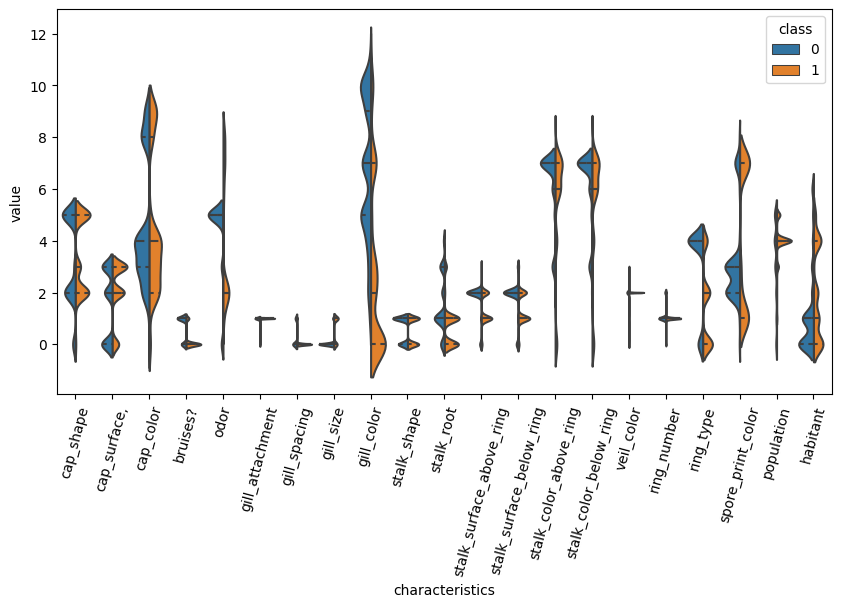

In [86]:
data_div = pd.melt(data,'class',var_name='characteristics')
#print(data_div.to_string())
fig, ax = plt.subplots(figsize = (10,5))
plot = sns.violinplot(ax=ax,data=data_div,x='characteristics', y='value',hue='class',split=True, inner='quartile')
data_without_class = data.drop(['class'],axis=1)
plot.set_xticklabels(labels=data_without_class.columns,rotation=75)

<h1>Check if the class data is balance</h1>

Text(0.5, 0, 'class')

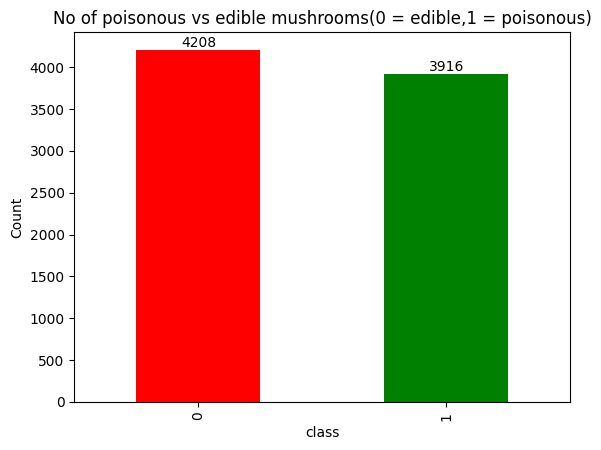

In [87]:
frequency = pd.Series(data['class'].value_counts().sort_index())
fig = frequency.plot(kind ='bar',color=['red','green'])
fig.bar_label(fig.containers[0])
plt.title('No of poisonous vs edible mushrooms(0 = edible,1 = poisonous)')
plt.ylabel('Count')
plt.xlabel('class')

The class data is seems to be balanced here since we are more interested in the poisonous mushroom. Although in real sense we can say the classes are balanced when they are not overlapping each other.I.e., when they are of the same length or size.

<h1> Visualizing features to see their correlation with each features</h1>

Text(0.5, 1.0, 'Correlation Matrix')

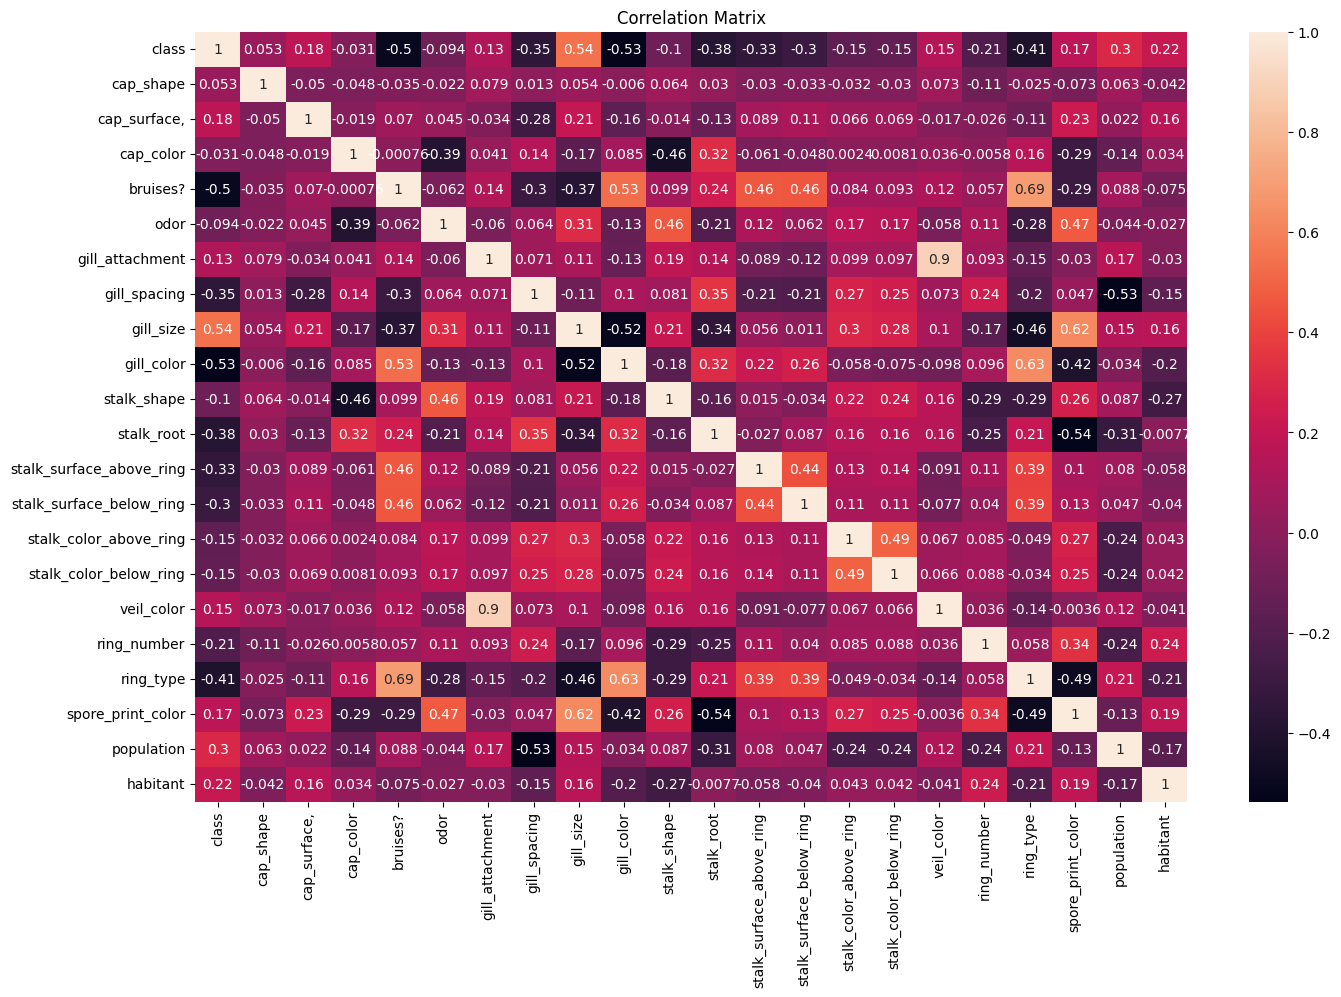

In [88]:
plt.figure(figsize=(16,10))
sns.heatmap(data.corr(),annot=True)
plt.title("Correlation Matrix")

In [89]:
corr_matrix = abs(data.corr().round(2))
corr_matrix

,class,cap_shape,"cap_surface,",cap_color,bruises?,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_above_ring,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_color,ring_number,ring_type,spore_print_color,population,habitant
class,1.00,0.05,0.18,0.03,0.50,0.09,0.13,0.35,0.54,0.53,...,0.33,0.30,0.15,0.15,0.15,0.21,0.41,0.17,0.30,0.22
cap_shape,0.05,1.00,0.05,0.05,0.04,0.02,0.08,0.01,0.05,0.01,...,0.03,0.03,0.03,0.03,0.07,0.11,0.03,0.07,0.06,0.04
"cap_surface,",0.18,0.05,1.00,0.02,0.07,0.05,0.03,0.28,0.21,0.16,...,0.09,0.11,0.07,0.07,0.02,0.03,0.11,0.23,0.02,0.16
cap_color,0.03,0.05,0.02,1.00,0.00,0.39,0.04,0.14,0.17,0.08,...,0.06,0.05,0.00,0.01,0.04,0.01,0.16,0.29,0.14,0.03
bruises?,0.50,0.04,0.07,0.00,1.00,0.06,0.14,0.30,0.37,0.53,...,0.46,0.46,0.08,0.09,0.12,0.06,0.69,0.29,0.09,0.08
odor,0.09,0.02,0.05,0.39,0.06,1.00,0.06,0.06,0.31,0.13,...,0.12,0.06,0.17,0.17,0.06,0.11,0.28,0.47,0.04,0.03
gill_attachment,0.13,0.08,0.03,0.04,0.14,0.06,1.00,0.07,0.11,0.13,...,0.09,0.12,0.10,0.10,0.90,0.09,0.15,0.03,0.17,0.03
gill_spacing,0.35,0.01,0.28,0.14,0.30,0.06,0.07,1.00,0.11,0.10,...,0.21,0.21,0.27,0.25,0.07,0.24,0.20,0.05,0.53,0.15
gill_size,0.54,0.05,0.21,0.17,0.37,0.31,0.11,0.11,1.00,0.52,...,0.06,0.01,0.30,0.28,0.10,0.17,0.46,0.62,0.15,0.16
gill_color,0.53,0.01,0.16,0.08,0.53,0.13,0.13,0.10,0.52,1.00,...,0.22,0.26,0.06,0.07,0.10,0.10,0.63,0.42,0.03,0.20


The above correlation matrix shows no important correlation with variables so we will use all the features for the input variables except the class features which is our target variable or label class

In [90]:
X = data.drop(columns=['class'])
Y = data['class']

<h1> Scaling the data to univariance so that all the x features takes similar ranges</h1>

In [91]:
std_scaler = StandardScaler()
X = pd.DataFrame(std_scaler.fit_transform(X),columns=X.columns)
X

,cap_shape,"cap_surface,",cap_color,bruises?,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,...,stalk_surface_above_ring,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_color,ring_number,ring_type,spore_print_color,population,habitant
0,1.029712,0.140128,-0.198250,1.185917,0.881938,0.162896,-0.438864,1.494683,-0.228998,-1.144806,...,0.683778,0.586385,0.622441,0.631991,0.142037,-0.256132,0.948081,-0.670195,-0.514389,2.030028
1,1.029712,0.140128,1.765874,1.185917,-1.970316,0.162896,-0.438864,-0.669038,-0.228998,-1.144806,...,0.683778,0.586385,0.622441,0.631991,0.142037,-0.256132,0.948081,-0.250471,-1.313108,-0.295730
2,-2.087047,0.140128,1.373049,1.185917,-0.544189,0.162896,-0.438864,-0.669038,0.053477,-1.144806,...,0.683778,0.586385,0.622441,0.631991,0.142037,-0.256132,0.948081,-0.250471,-1.313108,0.867149
3,1.029712,0.953270,1.373049,1.185917,0.881938,0.162896,-0.438864,1.494683,0.053477,-1.144806,...,0.683778,0.586385,0.622441,0.631991,0.142037,-0.256132,0.948081,-0.670195,-0.514389,2.030028
4,1.029712,0.140128,-0.591075,-0.843230,0.406562,0.162896,2.278612,-0.669038,-0.228998,0.873511,...,0.683778,0.586385,0.622441,0.631991,0.142037,-0.256132,-1.272216,-0.250471,-2.910546,-0.295730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,-0.216992,0.140128,-0.198250,-0.843230,0.406562,-6.138869,-0.438864,-0.669038,1.748325,-1.144806,...,0.683778,0.586385,-0.429288,-0.416681,-3.979055,-0.256132,0.948081,-1.509643,-2.111827,0.285710
8120,1.029712,0.140128,-0.198250,-0.843230,0.406562,-6.138869,-0.438864,-0.669038,1.748325,-1.144806,...,0.683778,0.586385,-0.429288,-0.416681,-8.100146,-0.256132,0.948081,-1.509643,0.284330,0.285710
8121,-0.840343,0.140128,-0.198250,-0.843230,0.406562,-6.138869,-0.438864,-0.669038,0.053477,-1.144806,...,0.683778,0.586385,-0.429288,-0.416681,-3.979055,-0.256132,0.948081,-1.509643,-2.111827,0.285710
8122,-0.216992,0.953270,-0.198250,-0.843230,1.832689,0.162896,-0.438864,1.494683,-1.358896,0.873511,...,0.683778,-0.893053,0.622441,0.631991,0.142037,-0.256132,-1.272216,1.428426,0.284330,0.285710


In [92]:
X = X.values.copy()
Y = Y.values.copy()


<h1> Split the data for  training and testing</h1>

In [93]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=123)

In [94]:
print('Actual size:',data.shape)
print('Training data size:',x_train.shape)
print('Testing data size:', x_test.shape)

Actual size: (8124, 22)
Training data size: (6499, 21)
Testing data size: (1625, 21)


<h1> Model Selection</h1> 

In [95]:
logistic_model = LogisticRegression()
SGD_model =  SGDClassifier()
svm_model = SVC(C=1.0,kernel='rbf')
dummy_classifier = DummyClassifier()

<h1> Training </h1>

In [96]:
logistic_model.fit(x_train,y_train)
SGD_model.fit(x_train,y_train)
svm_model.fit(x_train,y_train)
dummy_classifier.fit(x_train,y_train)

DummyClassifier()

<h1> Model Performance Evaluation </h1>

In [97]:
print("48% positive and 52% negative. Not bad, we have a balance data",np.sum(Y)/len(Y))

48% positive and 52% negative. Not bad, we have a balance data 0.48202855736090594


In [98]:
print('Logistic Regression Accuracy(%): {}%'.format(round(logistic_model.score(x_test,y_test)*100,2)))
print('Stochastic Gradient Accuracy Test: {}%'.format(round(SGD_model.score(x_test,y_test)*100,2)))
print('Suppport Vector Machine Accuracy Test(%): {}%'.format(round(svm_model.score(x_test,y_test)*100,2)))
print('Dummy Classifier Accuracy Test: {}%'.format(round(dummy_classifier.score(x_test,y_test)*100,2)))


Logistic Regression Accuracy(%): 95.45%
Stochastic Gradient Accuracy Test: 98.52%
Suppport Vector Machine Accuracy Test(%): 100.0%
Dummy Classifier Accuracy Test: 53.11%


<h1> Evaluating model performance with cross evaluation method</h1>

In [99]:
print('Logistic Regression Accuracy Test(%):',cross_val_score(logistic_model, x_train, y_train, cv=3, scoring="accuracy"))
print('SGD_model Accuracy Test(%):',cross_val_score(SGD_model, x_train, y_train, cv=3, scoring="accuracy"))
print('Support Vector Machine Accuracy Test(%):',cross_val_score(svm_model, x_train, y_train, cv=3, scoring="accuracy"))
print('Dummy Classifier Accuracy Test(%):',cross_val_score(dummy_classifier, x_train, y_train, cv=3, scoring="accuracy"))

Logistic Regression Accuracy Test(%): [0.94370097 0.96260388 0.95244691]
SGD_model Accuracy Test(%): [0.97831103 0.96306556 0.9787627 ]
Support Vector Machine Accuracy Test(%): [1. 1. 1.]
Dummy Classifier Accuracy Test(%): [0.51453623 0.51477378 0.51477378]


Most of the model gave almost 100% accuracy apart from the dummy classifier which always go for the majority class gave about 51%. But accuracy is not always the best measure for performance, let see other methods

<h1> confusion matrix</h1>

In [100]:
y_pred_lr_classifier = cross_val_predict(logistic_model,x_test, y_test, cv=3)
y_pred_SGD_classifier = cross_val_predict(SGD_model,x_test, y_test, cv=3)
y_pred_svm_classifier  = cross_val_predict(svm_model,x_test, y_test, cv=3)

In [101]:
cfm_lr = confusion_matrix(y_test,y_pred_lr_classifier)
cfm_SGD = confusion_matrix(y_test, y_pred_SGD_classifier)
cfm_svm = confusion_matrix(y_test,y_pred_svm_classifier)


print("Logistic Regression Confusion Matrix Prediction Result:",cfm_lr,'\n')
print("Stochastic Gradient Descent Confusion Matrix Prediction Result:",cfm_SGD,'\n')
print("Support Vector Machine Confusion Matrix Prediction Result",cfm_svm,'\n')

Logistic Regression Confusion Matrix Prediction Result: [[825  38]
 [ 58 704]] 

Stochastic Gradient Descent Confusion Matrix Prediction Result: [[843  20]
 [ 32 730]] 

Support Vector Machine Confusion Matrix Prediction Result [[861   2]
 [  6 756]] 



<h1>  Expected Perfect Prediction</h1>

In [102]:
y_train_perfect_prediction = y_train
confusion_matrix(y_train, y_train_perfect_prediction)

array([[3345,    0],
       [   0, 3154]], dtype=int64)

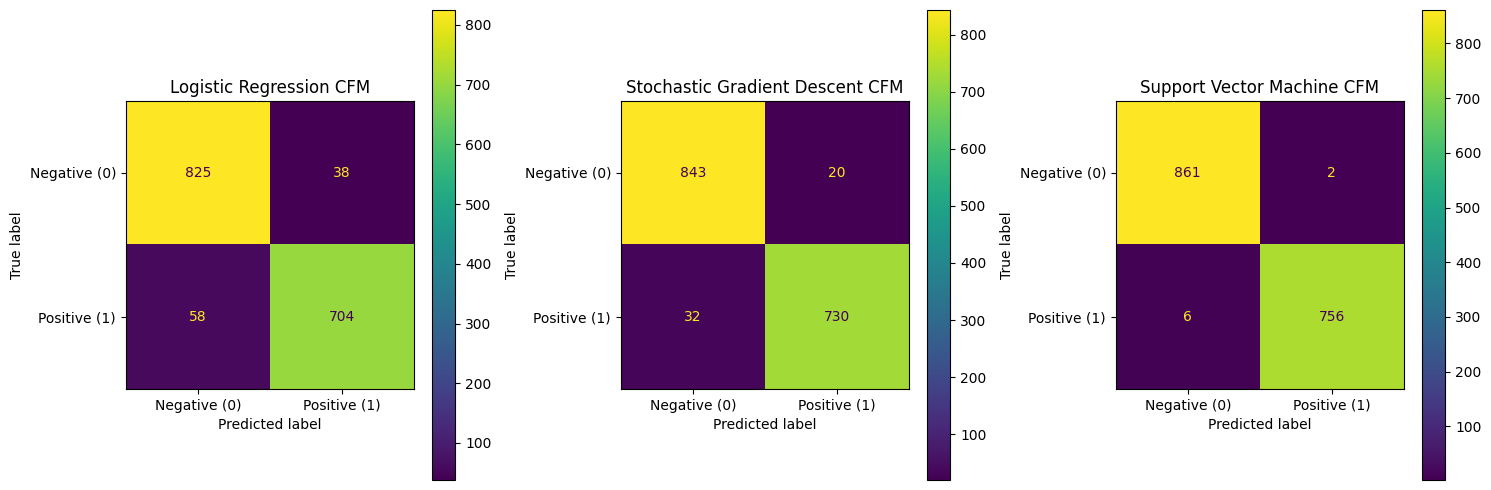

In [119]:
classifiers = [cfm_lr,cfm_SGD,cfm_svm]
labels = ['Negative (0)','Positive (1)']

fig, axes = plt.subplots(nrows=1,ncols=3,figsize=(15,5))


plt.title("Confussion Matrix")
for cls, ax in zip(classifiers, axes.flatten()):
   predictions = ConfusionMatrixDisplay(cls ,display_labels=labels).plot(ax=ax)

axes[0].set_title('Logistic Regression CFM')
axes[1].set_title('Stochastic Gradient Descent CFM')
axes[2].set_title('Support Vector Machine CFM')
plt.tight_layout()
plt.show()

<h1> Evaluation Reports for Model classifiers</h1>

In [138]:
print('Logistic Regression Report:\n\n',classification_report(y_test,y_pred_lr_classifier),'------------------------------------------------------------')
print('Stochastic Gradient Descent Report:\n\n',classification_report(y_test,y_pred_SGD_classifier),"-----------------------------------------------------------")
print("Support Vector Machine Report:\n\n", classification_report(y_test,y_pred_svm_classifier))

Logistic Regression Report:

               precision    recall  f1-score   support

           0       0.93      0.96      0.95       863
           1       0.95      0.92      0.94       762

    accuracy                           0.94      1625
   macro avg       0.94      0.94      0.94      1625
weighted avg       0.94      0.94      0.94      1625
 ------------------------------------------------------------
Stochastic Gradient Descent Report:

               precision    recall  f1-score   support

           0       0.96      0.98      0.97       863
           1       0.97      0.96      0.97       762

    accuracy                           0.97      1625
   macro avg       0.97      0.97      0.97      1625
weighted avg       0.97      0.97      0.97      1625
 -----------------------------------------------------------
Support Vector Machine Report:

               precision    recall  f1-score   support

           0       0.99      1.00      1.00       863
           1   

<h1> Precision, Recall and F1_score </h1>

In [105]:
print("Logistic regression classifier precision score:",precision_score(y_test,y_pred_lr_classifier))
print("Logistic Regression recall score:",recall_score(y_test,y_pred_lr_classifier))
print("Logistic Reggression F1_score:",f1_score(y_test,y_pred_lr_classifier))
print('\n')
print('--------------------------------------------------------------------------------------')

print("Stochastic gradient descent classifier precision score:",precision_score(y_test,y_pred_SGD_classifier))
print("Stochastic gradient descent classifier recall score:",recall_score(y_test,y_pred_SGD_classifier))
print("Stochastic gradient descent classifier F1_score:",f1_score(y_test,y_pred_SGD_classifier))
print('\n')
print('----------------------------------------------------------------------------------------')
print("Support Vector Machine classifier precision score:",precision_score(y_test,y_pred_svm_classifier))
print("Support Vector Machine classifier recall score:",recall_score(y_test,y_pred_svm_classifier))
print("Support Vector Machine classifier F1_score:",f1_score(y_test,y_pred_svm_classifier))

Logistic regression classifier precision score: 0.9487870619946092
Logistic Regression recall score: 0.9238845144356955
Logistic Reggression F1_score: 0.9361702127659574


--------------------------------------------------------------------------------------
Stochastic gradient descent classifier precision score: 0.9733333333333334
Stochastic gradient descent classifier recall score: 0.958005249343832
Stochastic gradient descent classifier F1_score: 0.9656084656084657


----------------------------------------------------------------------------------------
Support Vector Machine classifier precision score: 0.9973614775725593
Support Vector Machine classifier recall score: 0.9921259842519685
Support Vector Machine classifier F1_score: 0.9947368421052631


<h1> Decision function on test set</h1>

In [122]:
y_scores = SGD_model.decision_function(x_test)
y_scores

array([-2.56449179e+00, -1.93998438e+00, -2.40416857e+00,  1.83399562e+00,
       -1.27716280e+00,  8.34934476e+00,  3.81716252e+00,  1.04207246e+01,
       -2.12456635e+00, -1.24318183e+00, -1.25740423e+00, -2.35649843e+00,
        3.48152160e+00, -2.12167299e+00, -1.30056945e+00, -2.01518396e+00,
       -8.83103082e-01,  4.61706291e+00,  2.60357666e+00, -1.03176796e+00,
       -1.42943928e+00, -1.20736895e+00,  1.34040311e+00, -2.79555382e+00,
        1.45615709e+00,  2.37706265e+00,  1.12088021e+01,  2.35438616e+00,
        2.39181996e+00, -1.44823338e+01,  1.07637002e+01,  1.43535964e+00,
       -3.78264239e+01,  1.96360764e+00,  1.44927105e+00, -2.27223344e+00,
       -7.17898573e-01, -3.85529293e+01,  1.51138815e+00, -2.21883902e+00,
        1.90745766e+00, -1.55282289e+00, -2.06675401e+00, -3.98371338e+01,
        2.24183973e+00, -3.81758019e+01,  1.65287276e+00, -1.81118154e+00,
       -7.97107766e+00, -2.66471643e+01, -2.21963300e+00, -1.86239708e+00,
        3.44247105e-01,  

<h1> Set threshold to 0.3 and below to achieve a higher recall</h1>

In [125]:
threshold =  0.3
y_train_predict = (y_scores <= threshold)
y_train_predict

array([ True,  True,  True, False,  True, False, False, False,  True,
        True,  True,  True, False,  True,  True,  True,  True, False,
       False,  True,  True,  True, False,  True, False, False, False,
       False, False,  True, False, False,  True, False, False,  True,
        True,  True, False,  True, False,  True,  True,  True, False,
        True, False,  True,  True,  True,  True,  True, False, False,
        True,  True, False, False,  True, False,  True, False, False,
       False, False, False,  True,  True,  True, False, False,  True,
        True,  True,  True,  True,  True, False, False,  True, False,
        True,  True, False, False, False, False,  True, False,  True,
       False,  True, False,  True, False, False,  True,  True, False,
       False, False,  True,  True,  True,  True, False,  True, False,
       False,  True, False, False, False,  True, False,  True,  True,
        True,  True, False, False,  True,  True,  True,  True, False,
       False, False,

<h1> Tradeoff between precision and recall</h1>

In [126]:
thresh = 0
y_train_predict = (y_scores>=thresh)
y_train_predict

array([False, False, False,  True, False,  True,  True,  True, False,
       False, False, False,  True, False, False, False, False,  True,
        True, False, False, False,  True, False,  True,  True,  True,
        True,  True, False,  True,  True, False,  True,  True, False,
       False, False,  True, False,  True, False, False, False,  True,
       False,  True, False, False, False, False, False,  True,  True,
       False, False,  True,  True, False,  True, False,  True,  True,
        True,  True,  True, False, False, False,  True,  True, False,
       False, False, False, False, False,  True,  True, False,  True,
       False, False,  True,  True,  True,  True, False,  True, False,
        True, False,  True, False,  True,  True, False, False,  True,
        True,  True, False, False, False, False,  True, False,  True,
        True, False,  True,  True,  True, False,  True, False, False,
       False, False,  True,  True, False, False, False, False,  True,
        True,  True,

In [127]:
y_score = cross_val_predict(SGD_model,x_test,y_test,cv=3,method='decision_function')
y_score

array([-6.12633167e+00, -3.00352029e+00, -6.27553881e+00,  3.46884595e+00,
       -2.76183270e+00,  1.25548762e+01,  5.96498363e+00,  2.20390423e+01,
       -4.72917500e+00, -4.62196669e+00, -2.60785496e+00, -6.52934714e+00,
        4.65573547e+00, -3.99714982e+00, -8.87276102e-01, -4.63871916e+00,
       -3.14237559e+00,  9.63324571e+00,  4.69113075e+00, -1.65014373e+00,
       -1.05804783e+00, -4.71818043e-01,  2.55244466e+00, -5.19360910e+00,
       -1.14921276e+00,  1.84179580e+00,  2.19935312e+01,  1.55905393e+00,
        3.56254739e+00, -2.33216909e+01,  2.16737633e+01, -1.63766728e-01,
       -5.62793721e+01,  1.88450259e+00,  1.08693537e+00, -3.02612474e+00,
       -1.02684978e-01, -5.76126814e+01,  2.89283694e+00, -5.63297778e+00,
        3.53375306e+00, -3.07215346e+00, -4.48230649e+00, -5.95465271e+01,
        1.54557575e+00, -5.58752901e+01,  3.30759122e+00, -3.83160061e+00,
       -1.49682516e+01, -3.50057450e+01, -4.16024475e+00, -3.06154879e+00,
        4.64069119e-01,  

<h1> Visualize Precision and Recall base on some threshold</h1>

The goal is to achieve a higher recall with less precision, so we can be sure that people don't consume poisonous mushrooms

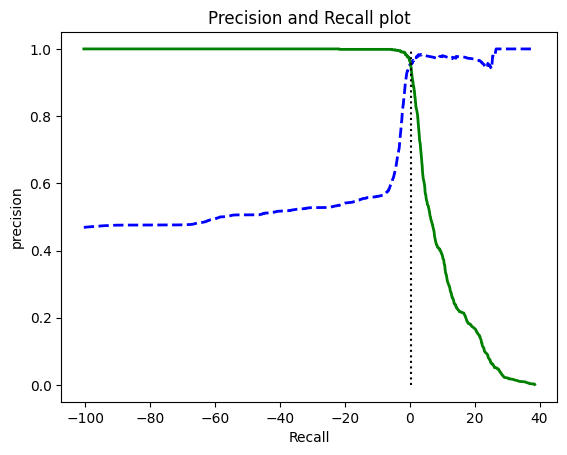

In [128]:
from sklearn.metrics import precision_recall_curve
precisions,recalls,thresholds = precision_recall_curve(y_test,y_score)
plt.title("Precision and Recall plot")
plt.xlabel('Recall')
plt.ylabel("precision")
plt.plot(thresholds,precisions[:-1],"b--",label='Precison',linewidth=2)
plt.plot(thresholds,recalls[:-1],"g-",label="Recall",linewidth=2)
plt.vlines(threshold,0,1.0,"k","dotted",label = "threshold")
plt.show()

<h1> Precision VS Recall</h1>

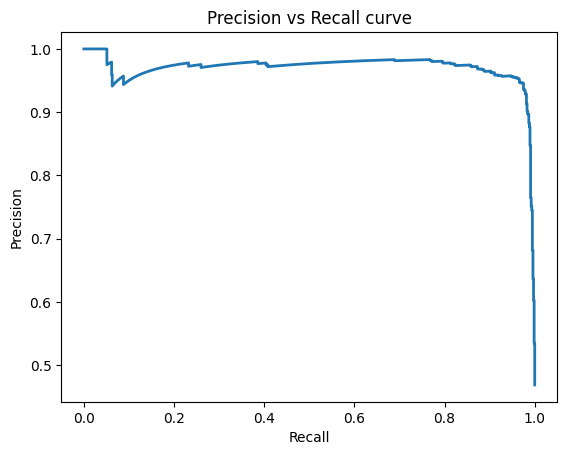

In [129]:
plt.plot(recalls,precisions,linewidth=2,label="Precision/Recall curve")
plt.xlabel("Recall")
plt.title("Precision vs Recall curve")
plt.ylabel("Precision")
plt.show()

In [130]:
idx_for_90_recall = (recalls>=0.95).argmax()
idx_for_90_recall

0

<h1> Summary Report</h1>

<justify>Predictions from the test dataset shows  that  Support vector machine classifier gave 99% positive result where precision and recall are equal to 0.99. The stochastic gradient descent gave 97% precision and 95% percent recall and f1_score of 96%. Logistic Regression classifier has 94% recall, 92% precision and 93% F1_score. The dataset seems to be clean and was able to classifier edible mushrooms as not poisonous and poisonous ones as poisonous. The classifier gave us a reasonable accuracy but for this assignment, We are interested in a higher recall with lower precision since we will like to minimize false negatives to ensure at at least 98% confident that the mushroom to be consumed by people is not poisonous.We have tried to tweak the stochastic gradient descent classifier by setting our threshold to 0.3(30%), to ensure we have a higher recall with a lower precision. You can see that we are able to achieve a higher recall using our Precision and prediction plot.</justify>